In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import seaborn as sns
import mudata as md
import matplotlib.pyplot as plt

import sys
sys.path.append('../')

from utils.gglasso_pipeline import gg_lasso_network_analysis
from utils.utils import calc_sparsity
from sklearn.covariance import empirical_covariance

In [2]:
ec_mudata = md.read("../data/preprocessed/ec_mudata_preprocessed.h5mu")
ec_mudata

c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\anndata\_core\anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\anndata\_core\anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\anndata\_core\anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\anndata\_core\anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\anndata\_core\anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\mudata\_core\mudata.py:491: UserWarning: Cannot j

MuData object with n_obs × n_vars = 2524 × 10926
  5 modalities
    all_genes:	2524 x 3642
      obs:	'strains', 'n_genes_by_counts', 'total_counts', 'n_counts'
      var:	'strains', 'matchin_protein', 'protein', 'n_cells', 'protein_name', 'rRNA', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
      uns:	'genes_match', 'protein_match', 'unmatch_genes'
      layers:	'log1p', 'norm_counts', 'raw_counts', 'sqrt_counts'
    high_abundance_genes:	2524 x 571
      obs:	'strains', 'n_genes_by_counts', 'total_counts', 'n_counts'
      var:	'strains', 'matchin_protein', 'protein', 'n_cells', 'protein_name', 'rRNA', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
      uns:	'genes_match', 'protein_match', 'unmatch_genes'
      layers:	'log1p', 'norm_counts', 'raw_counts', 'sqrt_counts'
    low_abundance_genes:	2524 x 3071
      obs:	'strains', 'n_genes_by_counts', 'total_counts', 'n_counts'
      var:	'strains', 'matchin_protein', 'protein', 'n_cells', 'protein_name', 'rRNA', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
      uns:	'genes_match', 'protein_match', 'unmatch_genes'
      layers:	'log1p', 'norm_counts', 'raw_counts', 'sqrt_counts'
    rRNA_genes:	2524 x 60
      obs:	'strains', 'n_genes_by_counts', 'total_counts', 'n_counts'
      var:	'strains', 'matchin_protein', 'protein', 'n_cells', 'protein_name', 'rRNA', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
      uns:	'genes_match', 'protein_match', 'unmatch_genes'
      layers:	'log1p', 'norm_counts', 'raw_counts', 'sqrt_counts'
    mRNA_genes:	2524 x 3582
      obs:	'strains', 'n_genes_by_counts', 'total_counts', 'n_counts'
      var:	'strains', 'matchin_protein', 'protein', 'n_cells', 'protein_name', 'rRNA', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
      uns:	'genes_match', 'protein_match', 'unmatch_genes'
      layers:	'log1p', 'norm_counts', 'raw_counts', 'sqrt_counts'

### First descriptive features of E. Coli strain

For the high abundance genes only
- Sparsity
- Mean & Median of counts per gene
- Mean & Median of genes per cell

In [3]:
print("Sparity:\t\t", calc_sparsity(ec_mudata["high_abundance_genes"].X.A))
print("Mean counts per gene:\t", np.mean(np.sum(ec_mudata["high_abundance_genes"].X.A, axis=1)))
print("Median counts per gene:\t", np.median(np.sum(ec_mudata["high_abundance_genes"].X.A, axis=1)))
print("Mean genes per cell: \t", np.mean(np.sum(ec_mudata["high_abundance_genes"].X.A, axis=0)))
print("Median genes per cell:\t", np.median(np.sum(ec_mudata["high_abundance_genes"].X.A, axis=0)))

Sparity:		 0.9732591638657678
Mean counts per gene:	 15.269017
Median counts per gene:	 12.0
Mean genes per cell: 	 67.49387
Median genes per cell:	 24.0


c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


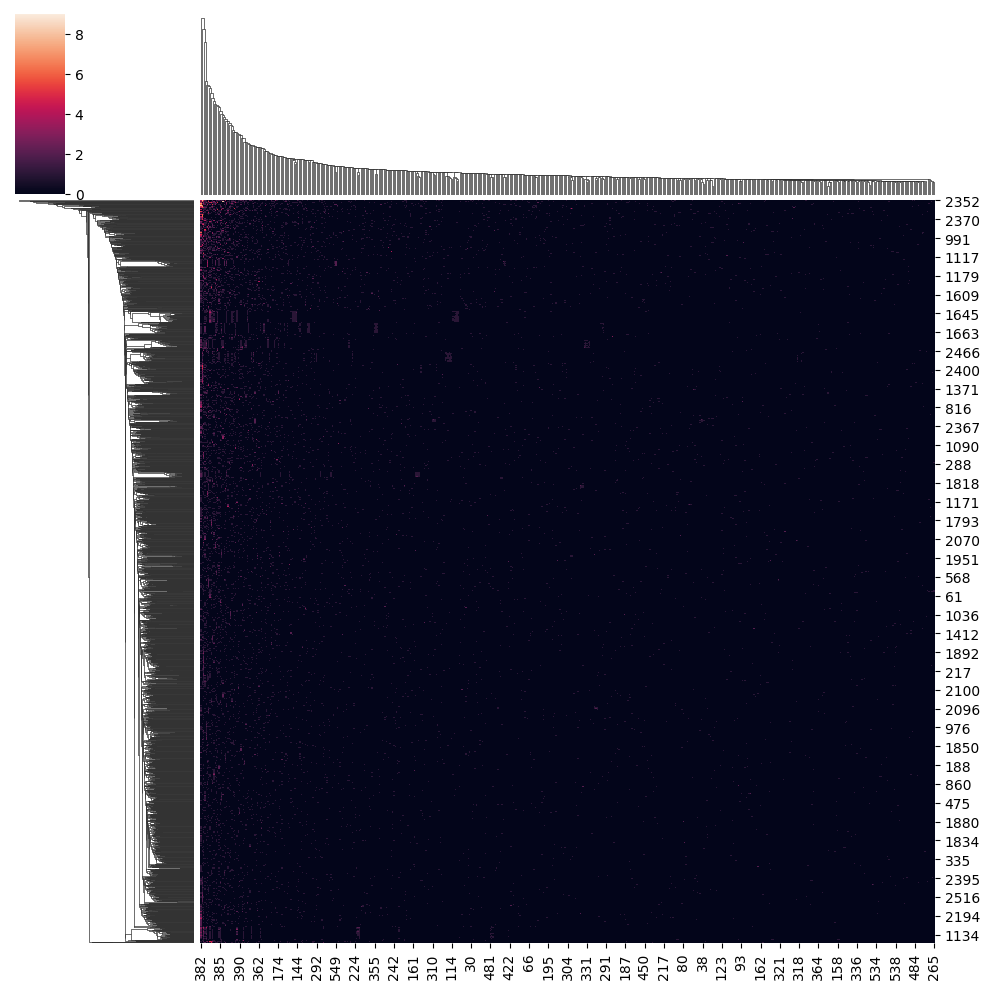

In [4]:
sns.clustermap(ec_mudata["high_abundance_genes"].X.A)

### Calculating Highly Variables Genes

Ranking all genes by their variance using the flavor ```seurat_v3```. This allows to calculate the ranking on the raw counts and not or standard practice total sum normalized data. (The lower the rank of a gene the higher its variance)

In [7]:
sc.pp.highly_variable_genes(ec_mudata["high_abundance_genes"], layer='raw_counts', n_top_genes=ec_mudata["high_abundance_genes"].shape[1], flavor='seurat_v3')

When plotting the genes sorted by their HVG rank against their expression level we can see that there is not correlation between them. Its is not the case that all of the highly expressed genes are also highly variant and expression.

<Axes: xlabel='highly_variable_rank', ylabel='total_counts'>

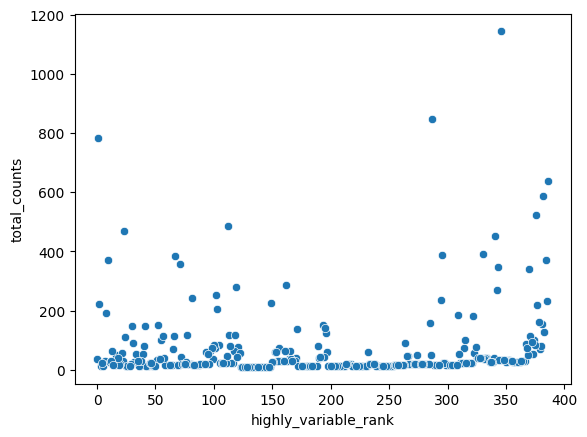

In [69]:
sns.scatterplot(data=ec_mudata["high_abundance_genes"].var, x="highly_variable_rank", y="total_counts", color="C0")

<Axes: xlabel='highly_variable_rank', ylabel='total_counts'>

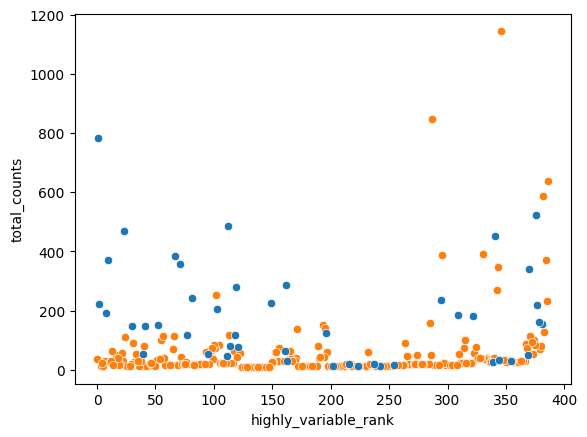

In [68]:
sns.scatterplot(data=adata_mRNA.var, x="highly_variable_rank", y="total_counts", color="C1")
sns.scatterplot(data=adata_rRNA.var, x="highly_variable_rank", y="total_counts", color="C0")


### 200 HVG
Selecting the 200 (most) Highly Variables Genes for analysis

In [4]:
hag10_hcc15_hvg200 = ec_mudata["high_abundance_genes"][:, ec_mudata["high_abundance_genes"].var["highly_variable_rank"] < 200].copy()
hag10_hcc15_hvg200

AnnData object with n_obs × n_vars = 1166 × 200
    obs: 'strains', 'n_genes_by_counts', 'total_counts', 'n_counts'
    var: 'strains', 'matchin_protein', 'protein', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'genes_match', 'neighbors', 'protein_match', 'umap', 'unmatch_genes', 'hvg'
    obsm: 'X_pca', 'X_umap'
    layers: 'log1p', 'norm_counts', 'raw_counts', 'sqrt_counts'
    obsp: 'connectivities', 'distances'

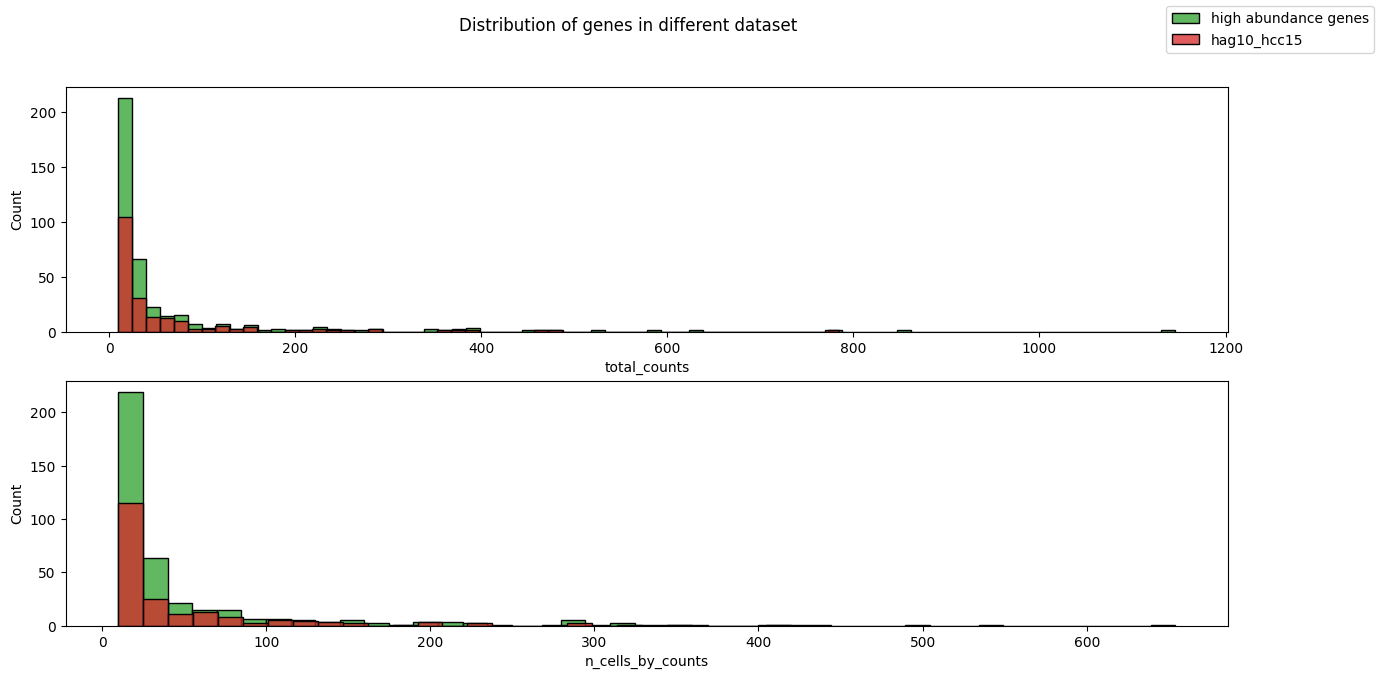

In [7]:
fig, axes = plt.subplots(2, 1, figsize=(15,7))
sns.histplot(ec_mudata["high_abundance_genes"].var["total_counts"], binwidth=15, kde=False, color="C2", label="high abundance genes", ax=axes[0])
sns.histplot(hag10_hcc15_hvg200.var["total_counts"], binwidth=15, kde=False, color="C3", label="hag10_hcc15", ax=axes[0])

sns.histplot(ec_mudata["high_abundance_genes"].var["n_cells_by_counts"], binwidth=15, kde=False, color="C2", ax=axes[1])
sns.histplot(hag10_hcc15_hvg200.var["n_cells_by_counts"], binwidth=15, kde=False, color="C3", ax=axes[1])

#axes[0].set_title("Total counts for genes")
#axes[1].set_title("Amount of cells for genes")

fig.suptitle("Distribution of genes in different dataset")
fig.legend()

Text(0.5, 1.0, 'Distribution of counts in each cell')

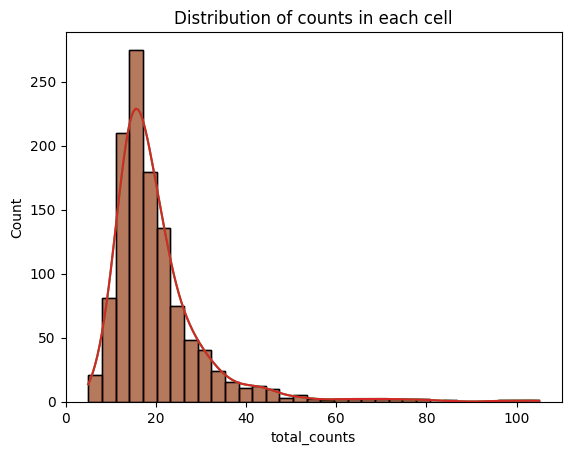

In [8]:
#fig, axes = plt.subplots(1, 1, figsize=(15,7))

sns.histplot(ec_mudata["high_abundance_genes"].obs["total_counts"], binwidth=3, kde=True, color="C2", label="high abundance genes",)
sns.histplot(hag10_hcc15_hvg200.obs["total_counts"], binwidth=3, kde=True, color="C3", label="hag10_hcc15",)

plt.title("Distribution of counts in each cell")

/home/jan/anaconda3/envs/bacdrop/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/home/jan/anaconda3/envs/bacdrop/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


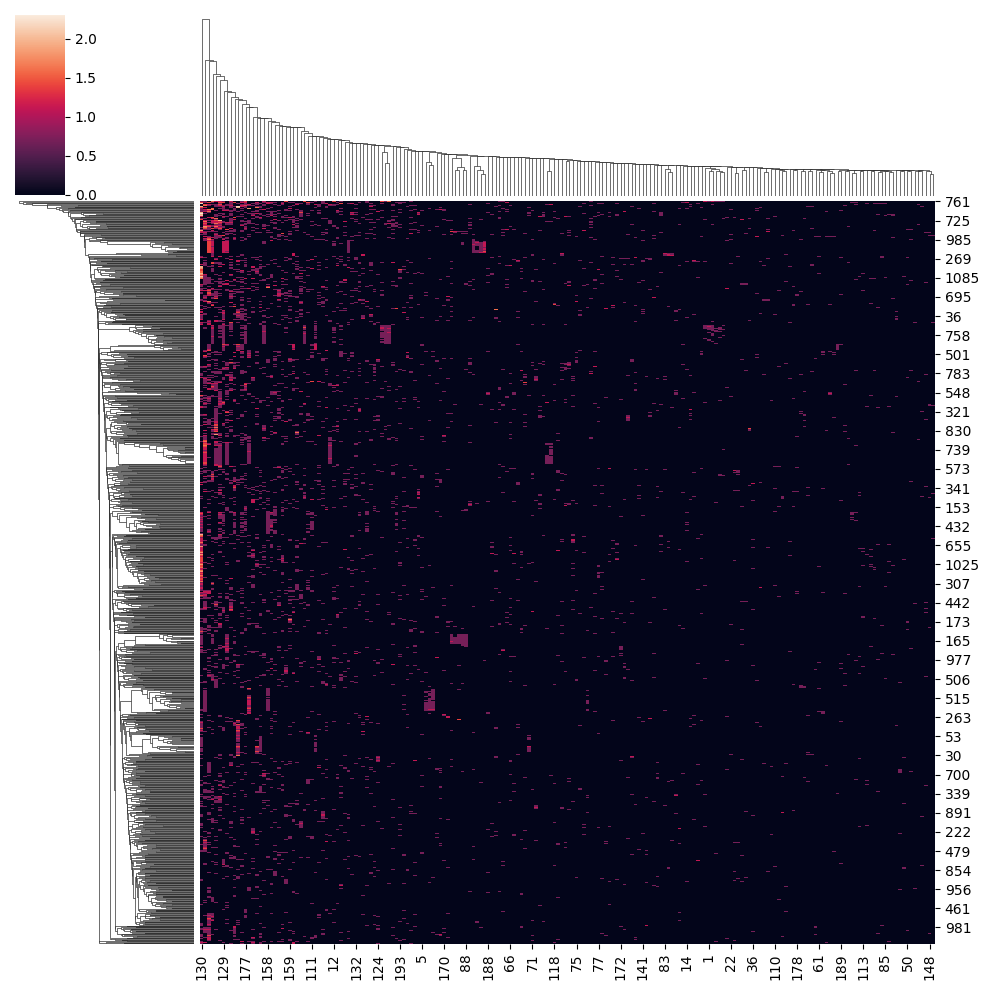

In [9]:
sns.clustermap(np.log1p(hag10_hcc15_hvg200.X.A))

In [10]:
1 - calc_sparsity(np.array(hag10_hcc15_hvg200.X.A, dtype=bool))

0.9594210977701544

In [37]:
hag10_hcc15_hvg200.var.loc[hag10_hcc15_hvg200.var.total_counts.sort_values()[-5:].index]

,strains,matchin_protein,protein,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,n_cells,highly_variable,highly_variable_rank,means,variances,variances_norm
cds-NP_312203.1,GSM5456505_PsA_CDS,match,NP_312203.1,281,0.319039,75.900515,372.0,281,True,9.0,0.319039,0.478384,1.241452
cds-NP_312189.1,GSM5456505_PsA_CDS,match,NP_312189.1,293,0.331046,74.871355,386.0,293,True,67.0,0.331046,0.429370,1.067782
cds-NP_312209.1,GSM5456505_PsA_CDS,match,NP_312209.1,327,0.402230,71.955403,469.0,327,True,23.0,0.402230,0.587428,1.164458
cds-NP_312196.1,GSM5456505_PsA_CDS,match,NP_312196.1,354,0.415952,69.639794,485.0,354,True,112.0,0.415952,0.540140,1.029329
cds-NP_312199.1,GSM5456505_PsA_CDS,match,NP_312199.1,420,0.672384,63.979417,784.0,420,True,1.0,0.672384,1.523477,1.632041


In [41]:
idx_5_most_abundand_genes = hag10_hcc15_hvg200.var.total_counts.sort_values()[-5:].index
idx_5_most_abundand_genes

Index(['cds-NP_312203.1', 'cds-NP_312189.1', 'cds-NP_312209.1',
       'cds-NP_312196.1', 'cds-NP_312199.1'],
      dtype='object')

In [43]:
for idx in idx_5_most_abundand_genes:
    print(hag10_hcc15_hvg200.var.index.get_loc(idx))

133
122
137
127
130


In [110]:
idx_5_most_hvr_genes = hag10_hcc15_hvg200.var.highly_variable_rank.sort_values()[:5].index
idx_5_most_hvr_genes

Index(['cds-NP_313181.1', 'cds-NP_312199.1', 'cds-NP_312210.1',
       'cds-NP_308223.1', 'cds-NP_313359.1'],
      dtype='object')

In [111]:
for idx in idx_5_most_hvr_genes:
    print(hag10_hcc15_hvg200.var.index.get_loc(idx))

190
130
138
22
198


In [5]:
cov_hag10_hcc15_hvg200 = empirical_covariance(hag10_hcc15_hvg200.layers["sqrt_counts"].A)

<Axes: >

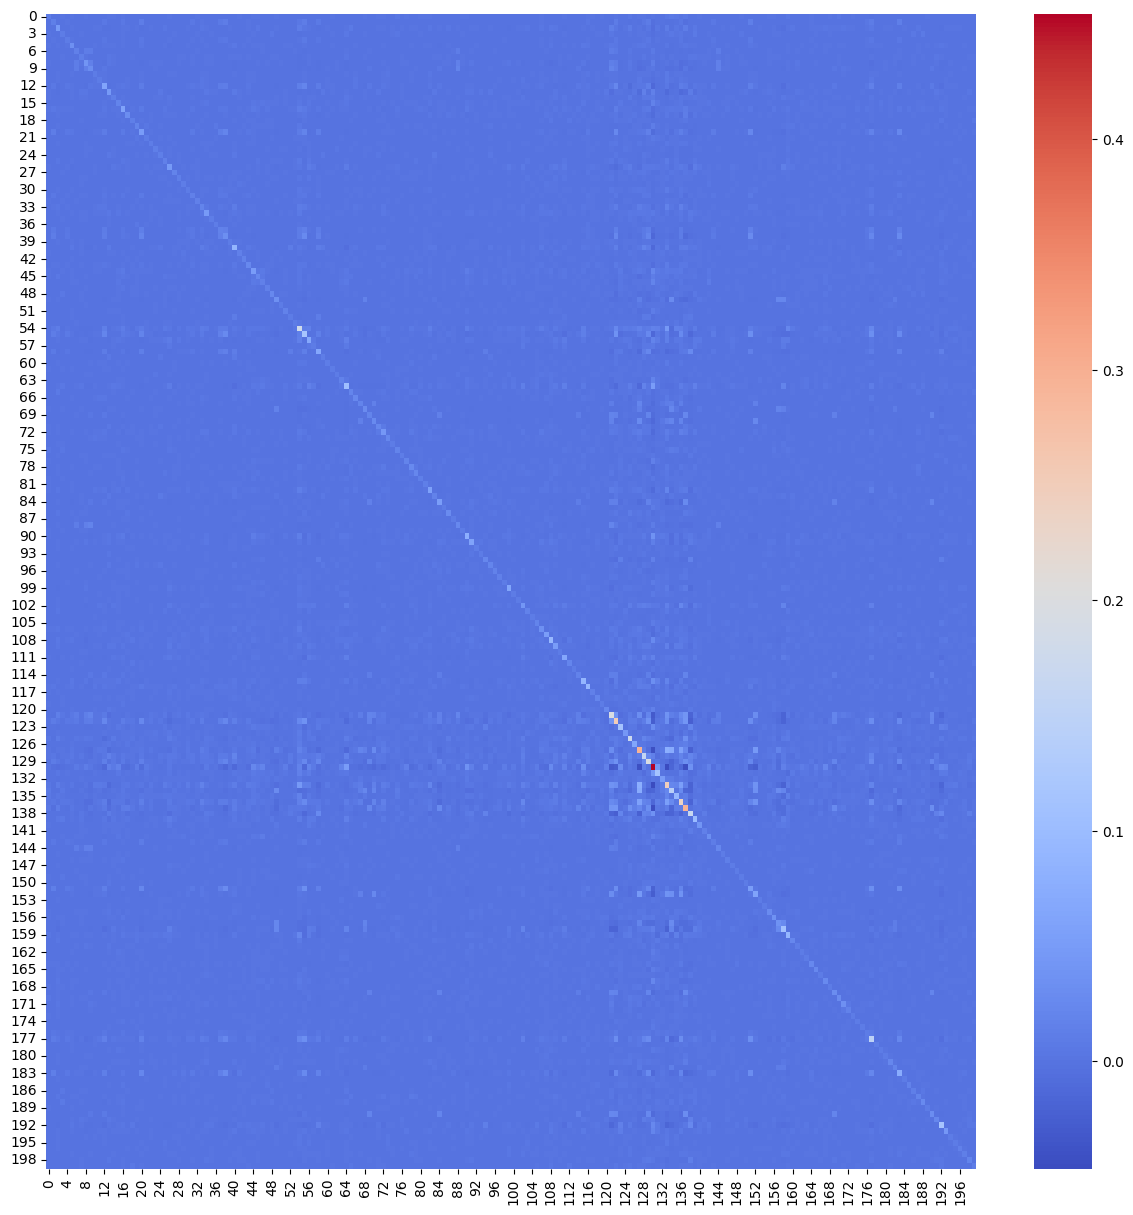

In [15]:
plt.figure(figsize=(15,15))
sns.heatmap(cov_hag10_hcc15_hvg200, cmap="coolwarm")

In [10]:
ggl_est = gg_lasso_network_analysis(N=hag10_hcc15_hvg200.shape[0], estimate=cov_hag10_hcc15_hvg200)
ggl_est.create_problem(latent=False)
ggl_est.model_selection(lambda1_range=np.logspace(0, -5, 200))

 
SINGLE GRAPHICAL LASSO PROBLEM 
Regularization parameters:
{'lambda1': 0.05, 'mu1': None}
ADMM terminated after 11 iterations with status: optimal.
ADMM terminated after 18 iterations with status: optimal.
ADMM terminated after 26 iterations with status: optimal.
ADMM terminated after 35 iterations with status: optimal.
ADMM terminated after 35 iterations with status: optimal.
ADMM terminated after 36 iterations with status: optimal.
ADMM terminated after 37 iterations with status: optimal.
ADMM terminated after 12 iterations with status: optimal.
ADMM terminated after 37 iterations with status: optimal.
ADMM terminated after 38 iterations with status: optimal.
ADMM terminated after 55 iterations with status: optimal.
ADMM terminated after 61 iterations with status: optimal.
ADMM terminated after 59 iterations with status: optimal.
ADMM terminated after 49 iterations with status: optimal.
ADMM terminated after 43 iterations with status: optimal.
ADMM terminated after 53 iterations wi

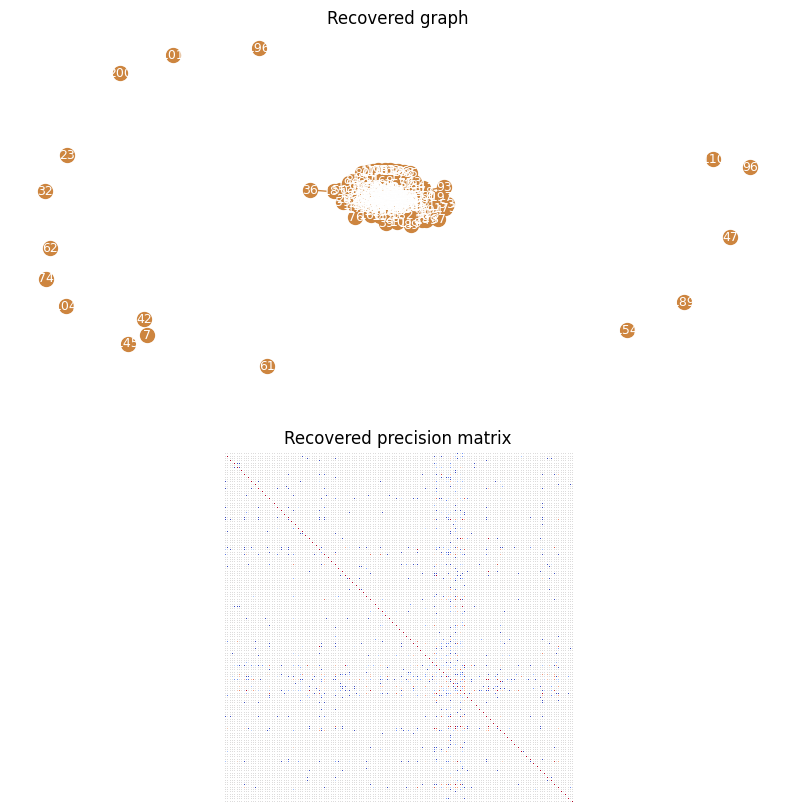

In [15]:
ggl_est.plot_graph_and_percision_matrix(fig_size=(10,10))

In [11]:
sol = ggl_est.P.solution.precision_

<Axes: >

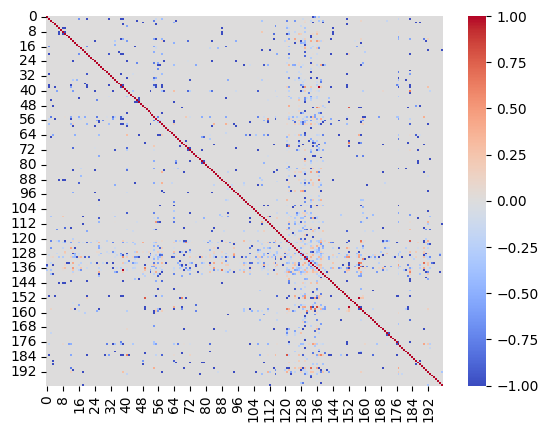

In [12]:
sns.heatmap(sol, cmap="coolwarm", vmin=-1, vmax=1)

/home/jan/anaconda3/envs/bacdrop/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/home/jan/anaconda3/envs/bacdrop/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


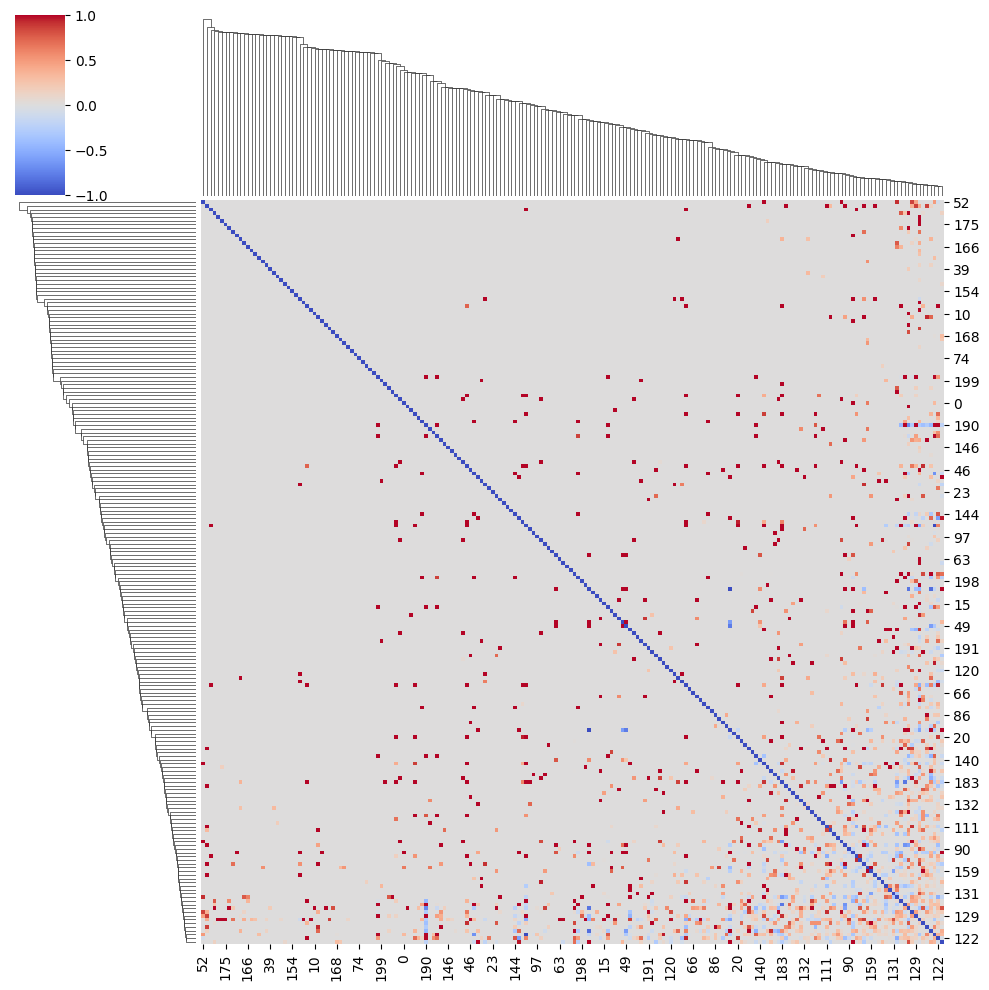

In [20]:
res = sns.clustermap(sol*-1, cmap="coolwarm", vmin=-1, vmax=1)

In [8]:
dict = ggl_est.P.__dict__
dict

{'S': array([[ 0.01103587, -0.00013162, -0.00052716, ..., -0.00013162,
         -0.00018262, -0.00010957],
        [-0.00013162,  0.01271167, -0.00061208, ..., -0.00015282,
         -0.00021204, -0.00012723],
        [-0.00052716, -0.00061208,  0.04814881, ...,  0.00024555,
         -0.00084928, -0.00050957],
        ...,
        [-0.00013162, -0.00015282,  0.00024555, ...,  0.01271167,
         -0.00021204, -0.00012723],
        [-0.00018262, -0.00021204, -0.00084928, ..., -0.00021204,
          0.01857371, -0.00017653],
        [-0.00010957, -0.00012723, -0.00050957, ..., -0.00012723,
         -0.00017653,  0.01018568]]),
 'N': 1166,
 'latent': False,
 'G': None,
 'do_scaling': False,
 'conforming': True,
 'multiple': False,
 'p': 200,
 'K': 1,
 'reg_params': {'lambda1': 0.0036543830709572546, 'mu1': 0},
 'modelselect_params': {'lambda1_range': array([1.00000000e+00, 9.43787828e-01, 8.90735464e-01, 8.40665289e-01,
         7.93409667e-01, 7.48810386e-01, 7.06718127e-01, 6.66991966e-0

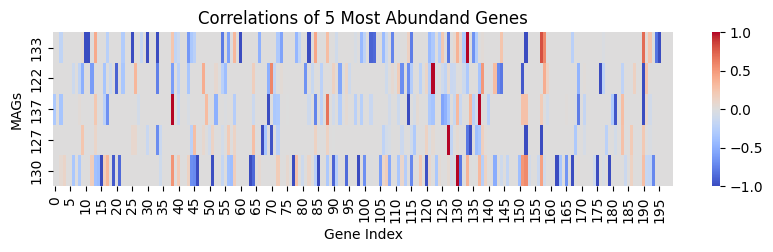

In [18]:
gene_correlations = pd.DataFrame(sol).iloc[[133, 122, 137, 127, 130]]

plt.figure(figsize=(10, 2))
sns.heatmap(gene_correlations, cmap="coolwarm", vmin=-1, vmax=1)
plt.title('Correlations of 5 Most Abundand Genes')
plt.xlabel('Gene Index')
plt.ylabel('MAGs')
plt.show()

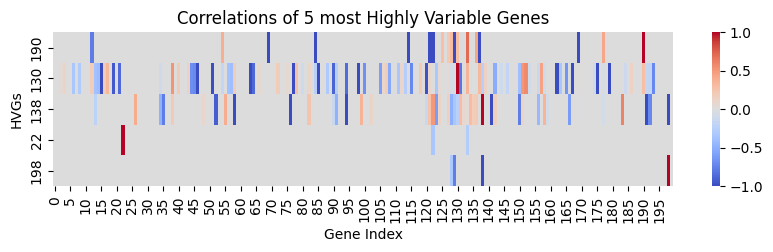

In [19]:
gene_correlations = pd.DataFrame(sol).iloc[[190, 130, 138, 22, 198]]

plt.figure(figsize=(10, 2))
sns.heatmap(gene_correlations, cmap="coolwarm", vmin=-1, vmax=1)
plt.title('Correlations of 5 most Highly Variable Genes')
plt.xlabel('Gene Index')
plt.ylabel('HVGs')
plt.show()

In [19]:
res.dendrogram_row.reordered_ind[:10]

[52, 57, 4, 30, 85, 179, 175, 11, 100, 149]

In [20]:
index_high_corr = hag10_hcc15_hvg200.var.index[res.dendrogram_row.reordered_ind[:10]]
index_high_corr

Index(['cds-NP_309742.1', 'cds-NP_309776.1', 'cds-NP_308085.1',
       'cds-NP_308611.1', 'cds-NP_311319.1', 'cds-NP_313051.2',
       'cds-NP_312923.1', 'cds-NP_308177.1', 'cds-NP_311839.1',
       'cds-NP_312391.1'],
      dtype='object')

In [21]:
hag10_hcc15_hvg200[:,index_high_corr].var

,strains,matchin_protein,protein,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,n_cells,highly_variable,highly_variable_rank,means,variances,variances_norm
cds-NP_309742.1,GSM5456504_Efm_CDS,match,NP_309742.1,10,0.008576,99.142367,10.0,10,True,137.0,0.008576,0.00851,0.998371
cds-NP_309776.1,GSM5456504_Efm_CDS,match,NP_309776.1,10,0.008576,99.142367,10.0,10,True,135.0,0.008576,0.00851,0.998371
cds-NP_308085.1,GSM5456504_Efm_CDS,match,NP_308085.1,10,0.008576,99.142367,10.0,10,True,141.0,0.008576,0.00851,0.998371
cds-NP_308611.1,GSM5456504_Efm_CDS,match,NP_308611.1,10,0.008576,99.142367,10.0,10,True,139.0,0.008576,0.00851,0.998371
cds-NP_311319.1,GSM5456504_Efm_CDS,match,NP_311319.1,10,0.008576,99.142367,10.0,10,True,131.0,0.008576,0.00851,0.998371
cds-NP_313051.2,GSM5456505_PsA_CDS,match,NP_313051.2,10,0.008576,99.142367,10.0,10,True,145.0,0.008576,0.00851,0.998371
cds-NP_312923.1,GSM5456505_PsA_CDS,match,NP_312923.1,10,0.008576,99.142367,10.0,10,True,146.0,0.008576,0.00851,0.998371
cds-NP_308177.1,GSM5456504_Efm_CDS,match,NP_308177.1,10,0.008576,99.142367,10.0,10,True,148.0,0.008576,0.00851,0.998371
cds-NP_311839.1,GSM5456505_PsA_CDS,match,NP_311839.1,10,0.008576,99.142367,10.0,10,True,125.0,0.008576,0.00851,0.998371
cds-NP_312391.1,GSM5456505_PsA_CDS,match,NP_312391.1,10,0.008576,99.142367,10.0,10,True,124.0,0.008576,0.00851,0.998371


In [9]:
dict.keys()

dict_keys(['S', 'N', 'latent', 'G', 'do_scaling', 'conforming', 'multiple', 'p', 'K', 'reg_params', 'modelselect_params', 'reg', 'solution', '_all_theta', '_all_lowrank', 'modelselect_stats'])

In [14]:
lambda1 = dict["reg_params"]["lambda1"]
lambda1

0.0036543830709572546

In [19]:
lambda_range = dict["modelselect_params"]["lambda1_range"]

In [21]:
idx_lambda1 = np.where(lambda_range == lambda1)

In [31]:
dict["modelselect_stats"].keys()

dict_keys(['BIC', 'AIC', 'SP', 'RANK', 'LAMBDA', 'MU', 'TAU', 'BEST', 'GAMMA'])

In [145]:
dict["modelselect_stats"]["RANK"]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [144]:
SP = dict["modelselect_stats"]["SP"][idx_lambda1]
SP

array([[0.05683417]])

In [41]:
dict["modelselect_stats"]["BIC"][0.1].min()

-646757.3413960502

In [42]:
np.where(dict["modelselect_stats"]["BIC"][0.1] == dict["modelselect_stats"]["BIC"][0.1].min())

(array([97]), array([0]))

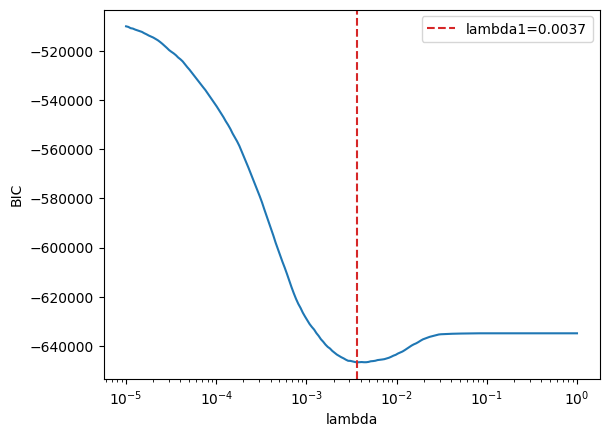

In [84]:
sns.lineplot(x=lambda_range, y=dict["modelselect_stats"]["BIC"][0.1].squeeze())
plt.axvline(x=lambda1, ls="--", color="C3", label="lambda1=0.0037")
plt.xscale("log")
plt.xlabel("lambda")
plt.ylabel("BIC")
#plt.text(0.1, 0.1, f"SP=0.0568")
plt.legend()

In [90]:
sol_bool = np.array(sol, dtype=bool)
sol_bool

array([[ True, False, False, ..., False, False, False],
       [False,  True, False, ..., False, False, False],
       [False, False,  True, ..., False, False, False],
       ...,
       [False, False, False, ...,  True, False, False],
       [False, False, False, ..., False,  True, False],
       [False, False, False, ..., False, False,  True]])

In [97]:
n_corr = np.sum(sol_bool, axis=0) - 1
n_corr

array([ 3, 11, 12,  7,  3,  4,  7,  0, 11, 13,  1,  2, 19, 21,  6,  5, 15,
        7,  5,  4, 14,  1,  3,  0,  6,  7, 20,  4,  2,  1,  5,  8,  0, 11,
       14,  3,  1, 15, 20,  1, 29,  2,  0, 10, 13,  8,  5,  0,  7,  9,  1,
        2,  7,  1, 40, 29, 22, 12, 32,  5,  2,  0,  0,  2, 29,  7,  4,  7,
       10, 10,  9,  8, 18,  2,  0,  8,  1,  3,  9,  8,  1,  1, 16,  8, 14,
        1,  6,  1, 10,  1, 20, 16,  2,  1, 10,  7,  0,  2,  1, 11,  3,  0,
       20,  5,  0,  3, 15, 11, 16, 17,  0, 24,  8,  1, 11, 20, 19,  2,  4,
        1,  7, 51, 66, 15, 13, 44, 10, 51, 48, 55, 91, 27, 11, 66, 44, 37,
       67, 60, 47, 29,  9,  3,  8, 10, 10,  0,  1,  6,  5,  1,  3, 22, 19,
        1,  0,  2, 10, 14, 33, 29,  8,  3,  1,  1,  7,  4,  2,  5,  2, 13,
        4, 10,  3,  1,  1,  1,  6, 44,  2,  2,  1,  6,  6, 33,  2,  1,  7,
        7,  7,  0, 17, 11, 27, 11,  1,  1,  0,  1,  3,  3])

In [106]:
_, _, r_value, _, _ = stats.linregress(hag10_hcc15_hvg200.var.total_counts, n_corr)
hag_r_squared = r_value ** 2
hag_r_squared

0.8577117626762625

<Axes: xlabel='total_counts'>

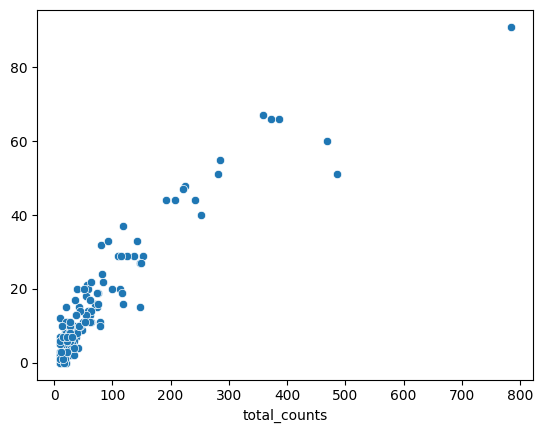

In [103]:
sns.scatterplot(x=hag10_hcc15_hvg200.var.total_counts, y=n_corr)

In [99]:
idx_counts_sorted = hag10_hcc15_hvg200.var.total_counts.sort_values()
idx_counts_sorted

cds-NP_309742.1     10.0
cds-NP_312300.1     10.0
cds-NP_309743.1     10.0
cds-NP_312347.1     10.0
cds-NP_312391.1     10.0
                   ...  
cds-NP_312203.1    372.0
cds-NP_312189.1    386.0
cds-NP_312209.1    469.0
cds-NP_312196.1    485.0
cds-NP_312199.1    784.0
Name: total_counts, Length: 200, dtype: float32

In [6]:
ggl_est_latent = gg_lasso_network_analysis(N=hag10_hcc15_hvg200.shape[0], estimate=cov_hag10_hcc15_hvg200)
ggl_est_latent.create_problem(latent=True)
ggl_est_latent.model_selection(lambda1_range=np.logspace(0, -5, 200))

 
SINGLE GRAPHICAL LASSO PROBLEM WITH LATENT VARIABLES
Regularization parameters:
{'lambda1': 0.05, 'mu1': None}
ADMM terminated after 19 iterations with status: optimal.
ADMM terminated after 8 iterations with status: optimal.
ADMM terminated after 8 iterations with status: optimal.
ADMM terminated after 8 iterations with status: optimal.
ADMM terminated after 8 iterations with status: optimal.
ADMM terminated after 8 iterations with status: optimal.
ADMM terminated after 8 iterations with status: optimal.
ADMM terminated after 8 iterations with status: optimal.
ADMM terminated after 76 iterations with status: optimal.
ADMM terminated after 193 iterations with status: optimal.
ADMM terminated after 15 iterations with status: optimal.
ADMM terminated after 8 iterations with status: optimal.
ADMM terminated after 8 iterations with status: optimal.
ADMM terminated after 8 iterations with status: optimal.
ADMM terminated after 8 iterations with status: optimal.
ADMM terminated after 8 ite

In [7]:
sol_latent = ggl_est_latent.P.solution.precision_

/home/jan/anaconda3/envs/bacdrop/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/home/jan/anaconda3/envs/bacdrop/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


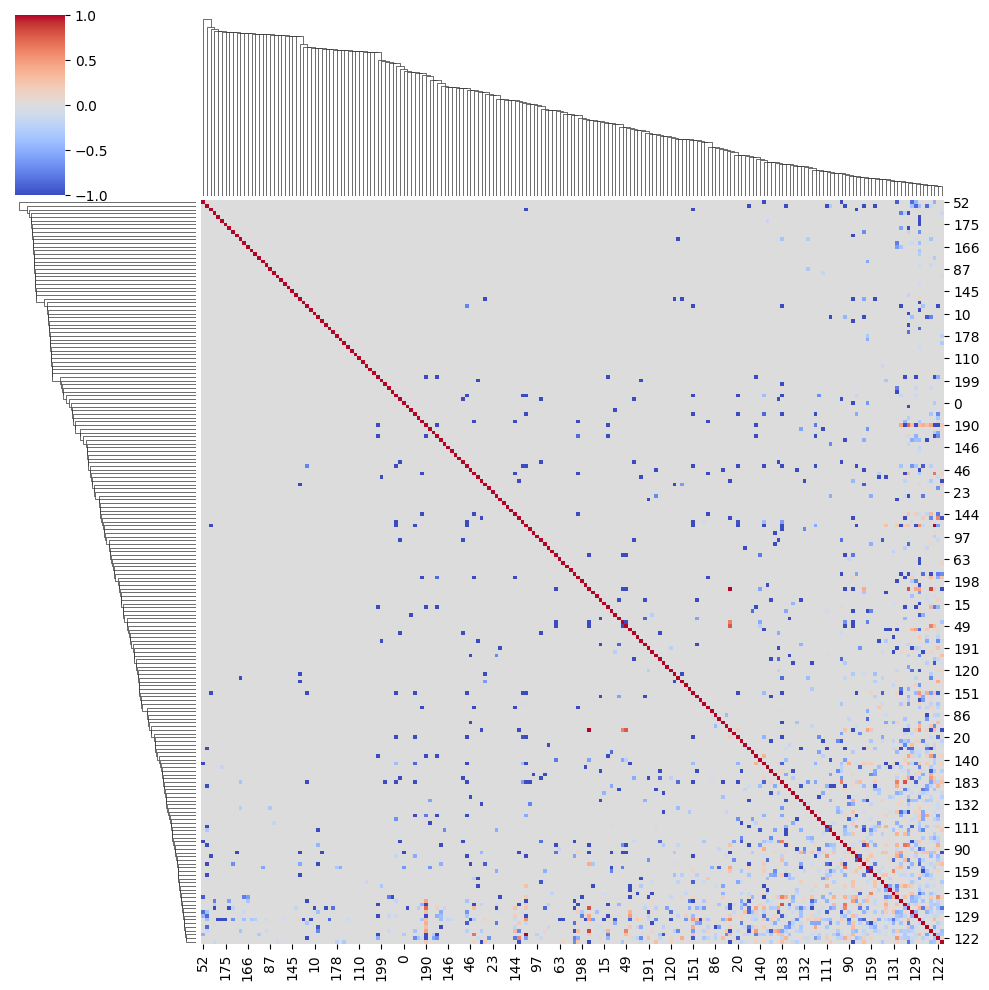

In [146]:
res = sns.clustermap(sol_latent , cmap="coolwarm", vmin=-1, vmax=1)

In [124]:
dict_latent = ggl_est_latent.P.__dict__
dict_latent

{'S': array([[ 0.01103587, -0.00013162, -0.00052716, ..., -0.00013162,
         -0.00018262, -0.00010957],
        [-0.00013162,  0.01271167, -0.00061208, ..., -0.00015282,
         -0.00021204, -0.00012723],
        [-0.00052716, -0.00061208,  0.04814881, ...,  0.00024555,
         -0.00084928, -0.00050957],
        ...,
        [-0.00013162, -0.00015282,  0.00024555, ...,  0.01271167,
         -0.00021204, -0.00012723],
        [-0.00018262, -0.00021204, -0.00084928, ..., -0.00021204,
          0.01857371, -0.00017653],
        [-0.00010957, -0.00012723, -0.00050957, ..., -0.00012723,
         -0.00017653,  0.01018568]]),
 'N': 1166,
 'latent': True,
 'G': None,
 'do_scaling': False,
 'conforming': True,
 'multiple': False,
 'p': 200,
 'K': 1,
 'reg_params': {'lambda1': 0.0036543830709572546, 'mu1': 0.1},
 'modelselect_params': {'lambda1_range': array([1.00000000e+00, 9.43787828e-01, 8.90735464e-01, 8.40665289e-01,
         7.93409667e-01, 7.48810386e-01, 7.06718127e-01, 6.66991966e-

In [131]:
dict_latent["modelselect_stats"].keys()

dict_keys(['BIC', 'AIC', 'SP', 'RANK', 'LAMBDA', 'MU', 'TAU', 'BEST', 'GAMMA'])

In [133]:
dict_latent["modelselect_stats"]["RANK"].shape

(200, 10)

<Axes: >

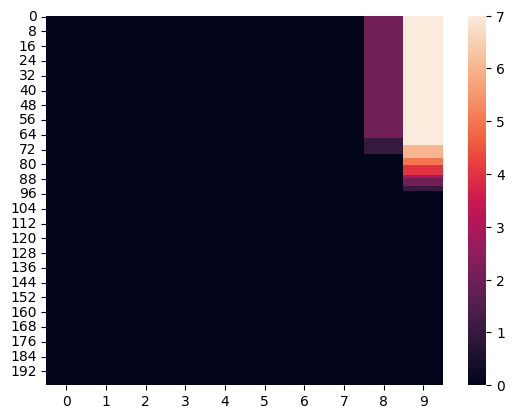

In [134]:
sns.heatmap(dict_latent["modelselect_stats"]["RANK"])

<Axes: >

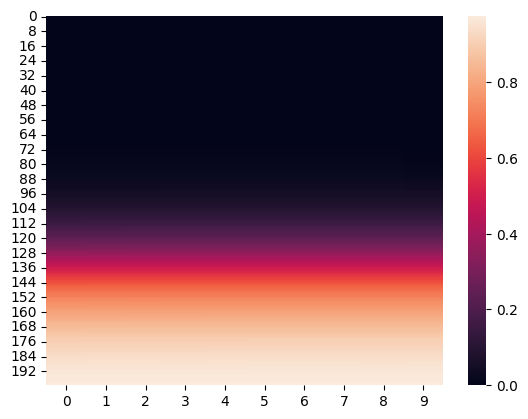

In [135]:
sns.heatmap(dict_latent["modelselect_stats"]["SP"])

In [160]:
ggl_est_latent.P.solution.__dict__

{'multiple': False,
 'latent': True,
 'conforming': True,
 'K': 1,
 'n_samples': 1166,
 'n_features': 200,
 'precision_': array([[91.00743188,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        , 94.10735128,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        , 21.40666363, ..., -0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.        ,  0.        , -0.        , ..., 78.67059532,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         55.52040968,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        , 98.93447632]]),
 'sample_covariance_': array([[ 0.01103587, -0.00013162, -0.00052716, ..., -0.00013162,
         -0.00018262, -0.00010957],
        [-0.00013162,  0.01271167, -0.00061208, ..., -0.00015282,
         -0.00021204, -0.00012723],
        [-0.00052716, -0.0

In [150]:
llambda_range = dict_latent["modelselect_params"]["lambda1_range"]

In [157]:
dict_latent["modelselect_stats"]["BIC"][0.1][:,9:].squeeze()

(200, 1)

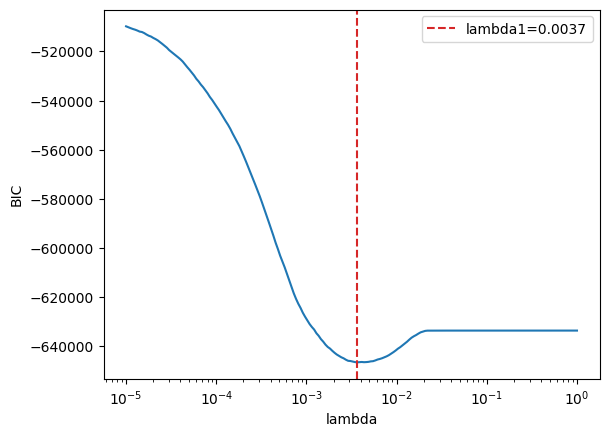

In [158]:
sns.lineplot(x=dict_latent["modelselect_params"]["lambda1_range"], y=dict_latent["modelselect_stats"]["BIC"][0.1][:,9:].squeeze())
plt.axvline(x=lambda1, ls="--", color="C3", label="lambda1=0.0037")
plt.xscale("log")
plt.xlabel("lambda")
plt.ylabel("BIC")
#plt.text(0.1, 0.1, f"SP=0.0568")
plt.legend()

- numbers for notebooks,
- pipelines
- sgl for all species. 
- pp & filter for species
- writing
- comparing to probebase
- 4 species analysis